<a href="https://colab.research.google.com/github/sdd261/Machine_Learning/blob/main/pca/pca-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [11]:
!unzip train.csv.zip


Archive:  train.csv.zip
  inflating: train.csv               


In [27]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [28]:
df = pd.read_csv('train.csv')

In [29]:
df.shape

(42000, 785)

In [30]:
df.sample

<bound method NDFrame.sample of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]>

In [31]:
import matplotlib.pyplot as plt


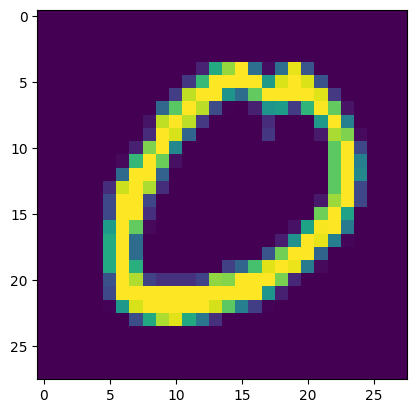

In [32]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [33]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape

(33600, 784)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

21.63784384727478


In [40]:
#accuarcy without pca
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# PCA
#choose component whatever you want (columns)
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [47]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [48]:
#here i take 200 columns
X_train_trf.shape

(33600, 200)

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(X_test_trf)

In [52]:
#with applying pca on 200 columns (dimentionlity redicution)
accuracy_score(y_test,y_pred)

0.9511904761904761

In [53]:
#try pca on multiple columns and check accuracy
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))

0.25821428571428573
0.3238095238095238
0.5101190476190476
0.6663095238095238
0.7382142857142857
0.8223809523809524
0.8433333333333334
0.8722619047619048
0.8872619047619048
0.9054761904761904
0.9120238095238096
0.9188095238095239
0.9277380952380953
0.934047619047619
0.9386904761904762
0.9379761904761905
0.9401190476190476
0.9396428571428571
0.9422619047619047
0.9441666666666667
0.9442857142857143
0.9439285714285715
0.9452380952380952
0.9454761904761905


KeyboardInterrupt: 

In [54]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [55]:
X_train_trf

array([[-2.71865303, -0.48998875],
       [-0.67714713, -6.75292874],
       [-3.03306816,  6.50955279],
       ...,
       [ 2.14882434,  0.78092679],
       [ 1.0596265 ,  0.94699991],
       [17.70251755,  1.96131688]])

In [56]:
#use plotly for check dimension
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [57]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [58]:
X_train_trf

array([[-2.71862021, -0.48900928,  1.13595355],
       [-0.67700188, -6.75391174, -2.33646218],
       [-3.03321866,  6.51031837,  7.49269364],
       ...,
       [ 2.14880776,  0.77971306, -0.7484218 ],
       [ 1.05958573,  0.94800807,  3.94973018],
       [17.70258659,  1.96094402, -4.94428585]])

In [59]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [60]:
# Eigen values
pca.explained_variance_


array([40.67111198, 29.17023349, 26.74459579])

In [61]:
# Eigen vectors
pca.components_.shape


(3, 784)

In [62]:

pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [63]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [64]:
pca.explained_variance_.shape

(784,)

In [65]:
pca.components_.shape

(784, 784)

In [66]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

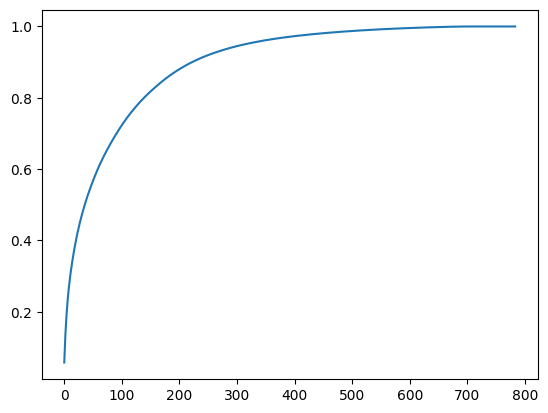

In [67]:
#need to explain 90% variance here we achieve at 200 component
plt.plot(np.cumsum(pca.explained_variance_ratio_))